## Analysis Airbnb ##

Notes: 
- listing_id is for property

### import libraries ###

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load data ###

In [83]:
FOLDERS = ['data_airbnb_syd/20201214/',
           'data_airbnb_syd/20210110/',
           'data_airbnb_syd/20210208/',
           'data_airbnb_syd/20210304/',
           'data_airbnb_syd/20210410/',
           'data_airbnb_syd/20210605/',
           'data_airbnb_syd/20210705/',
           'data_airbnb_syd/20210807/',
           'data_airbnb_syd/20210908/',
           'data_airbnb_syd/20211009/',
           'data_airbnb_syd/20211106/']

In [7]:
df_bnb_cal_detailed = pd.read_csv("./data_airbnb_syd/20211106/calendar_detailed.csv", header='infer')
df_bnb_cal_detailed.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,837264,2021-11-07,f,$40.00,$40.00,90.0,99.0
1,835531,2021-11-07,f,$93.00,$93.00,5.0,1124.0
2,835531,2021-11-08,f,$93.00,$93.00,5.0,1124.0
3,835531,2021-11-09,f,$93.00,$93.00,5.0,1124.0
4,835531,2021-11-10,f,$93.00,$93.00,5.0,1124.0


In [8]:
df_bnb_listings_detailed = pd.read_csv("./data_airbnb_syd/20211106/listings_detailed.csv", header='infer')
df_bnb_listings_detailed

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11156,https://www.airbnb.com/rooms/11156,20211106153124,2021-11-07,An Oasis in the City,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...",https://a0.muscache.com/pictures/2797669/17895...,40855,https://www.airbnb.com/users/show/40855,...,4.77,4.82,4.71,NaN,f,1,0,1,0,2.02
1,14250,https://www.airbnb.com/rooms/14250,20211106153124,2021-11-07,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Balgowlah Heights is one of the most prestigio...,https://a0.muscache.com/pictures/56935671/fdb8...,55948,https://www.airbnb.com/users/show/55948,...,4.33,4.67,4.33,Exempt,f,2,2,0,0,0.04
2,15253,https://www.airbnb.com/rooms/15253,20211106153124,2021-11-07,Unique Designer Rooftop Apartment in City Loca...,Penthouse living at it best ... You will be st...,The location is really central and there is nu...,https://a0.muscache.com/pictures/46dcb8a1-5d5b...,59850,https://www.airbnb.com/users/show/59850,...,4.67,4.70,4.47,PID-STRA-24061-7,t,1,0,1,0,3.54
3,44545,https://www.airbnb.com/rooms/44545,20211106153124,2021-11-07,Sunny Darlinghurst Warehouse Apartment,Sunny warehouse/loft apartment in the heart of...,Darlinghurst is home to some of Sydney's best ...,https://a0.muscache.com/pictures/a88d8e14-4f63...,112237,https://www.airbnb.com/users/show/112237,...,4.96,4.93,4.77,NaN,f,1,1,0,0,1.00
4,58506,https://www.airbnb.com/rooms/58506,20211106153124,2021-11-07,"Studio Yindi @ Mosman, Sydney","An open plan apartment, which opens onto a spa...","Mosman is a smart, middle to upper class subur...",https://a0.muscache.com/pictures/23497720/d30f...,279955,https://www.airbnb.com/users/show/279955,...,4.90,4.72,4.67,PID-STRA-6093,f,1,1,0,0,3.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20508,53173346,https://www.airbnb.com/rooms/53173346,20211106153124,2021-11-07,Lovely 2-bedroom Apartment with secure parking.,This ultra-modern apartment is the perfect pla...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,430450652,https://www.airbnb.com/users/show/430450652,...,NaN,NaN,NaN,PID-STRA-26906,f,1,1,0,0,NaN
20509,53176438,https://www.airbnb.com/rooms/53176438,20211106153124,2021-11-07,THE TERRACE,This large 2 bedroom terrace (with a study) is...,NaN,https://a0.muscache.com/pictures/f0c6864b-8ee9...,7940457,https://www.airbnb.com/users/show/7940457,...,NaN,NaN,NaN,Exempt,f,8,8,0,0,NaN
20510,53176514,https://www.airbnb.com/rooms/53176514,20211106153124,2021-11-07,Sea La Vie,Sea La Vie is a bright and breezy abode locate...,NaN,https://a0.muscache.com/pictures/4bc3f4dc-1be2...,8439389,https://www.airbnb.com/users/show/8439389,...,NaN,NaN,NaN,PID-STRA-26918,t,1,1,0,0,NaN
20511,53190300,https://www.airbnb.com/rooms/53190300,20211106153124,2021-11-07,Amalfi Villa by Palm Beach Holiday Rentals,Villa Amalfi has arguably the best views in Pa...,NaN,https://a0.muscache.com/pictures/dc0a17aa-73d7...,23717928,https://www.airbnb.com/users/show/23717928,...,NaN,NaN,NaN,PID-STRA-20810,f,32,32,0,0,NaN


In [9]:
df_bnb_listings_summary = pd.read_csv("./data_airbnb_syd/20211106/listings.csv", header='infer')
df_bnb_listings_summary

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11156,An Oasis in the City,40855,Colleen,NaN,Sydney,-33.867670,151.224970,Private room,65,90,196,2020-03-05,2.02,1,364,0,NaN
1,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.800840,151.263780,Entire home/apt,470,2,3,2021-06-01,0.04,2,129,1,Exempt
2,15253,Unique Designer Rooftop Apartment in City Loca...,59850,Morag,NaN,Sydney,-33.879640,151.216800,Private room,79,2,377,2021-04-19,3.54,1,342,13,PID-STRA-24061-7
3,44545,Sunny Darlinghurst Warehouse Apartment,112237,Atari,NaN,Sydney,-33.878880,151.214390,Entire home/apt,130,90,76,2019-08-20,1.00,1,0,0,NaN
4,58506,"Studio Yindi @ Mosman, Sydney",279955,John,NaN,Mosman,-33.817480,151.234840,Entire home/apt,140,2,293,2021-03-22,3.13,1,311,11,PID-STRA-6093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20508,53173346,Lovely 2-bedroom Apartment with secure parking.,430450652,Osita,NaN,Liverpool,-33.926497,150.918602,Entire home/apt,150,1,0,NaN,NaN,1,358,0,PID-STRA-26906
20509,53176438,THE TERRACE,7940457,Donna,NaN,Penrith,-33.730311,150.701040,Entire home/apt,179,2,0,NaN,NaN,8,89,0,Exempt
20510,53176514,Sea La Vie,8439389,Theo,NaN,Pittwater,-33.658864,151.315607,Entire home/apt,140,2,0,NaN,NaN,1,15,0,PID-STRA-26918
20511,53190300,Amalfi Villa by Palm Beach Holiday Rentals,23717928,Palm Beach Holiday Rentals,NaN,Pittwater,-33.604050,151.331859,Entire home/apt,5000,2,0,NaN,NaN,32,358,0,PID-STRA-20810


In [10]:
df_bnb_reviews_detailed = pd.read_csv("./data_airbnb_syd/20211106/reviews_detailed.csv", header='infer')
df_bnb_reviews_detailed.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,11156,19220,2009-12-05,52946,Jeff,Colleen was friendly and very helpful regardin...
1,11156,32592,2010-03-31,99382,Michael,"Great place, centrally located, easy walk to t..."


In [127]:
df_bnb_reviews_detailed.describe()

,listing_id,id,reviewer_id
count,3.676050e+05,3.676050e+05,3.676050e+05
mean,1.958782e+07,1.337795e+16,1.046050e+08
std,1.263440e+07,7.540653e+16,9.855151e+07
min,1.115600e+04,1.922000e+04,1.187000e+03
25%,9.451455e+06,2.212332e+08,2.572046e+07
50%,1.871331e+07,4.244980e+08,7.075962e+07
75%,2.848391e+07,6.081603e+08,1.586878e+08
max,5.301272e+07,4.901296e+17,4.298505e+08


In [11]:
df_bnb_reviews_summary = pd.read_csv("./data_airbnb_syd/20211106/reviews.csv", header='infer')
df_bnb_reviews_summary.head(2)

,listing_id,date
0,11156,2009-12-05
1,11156,2010-03-31


In [128]:
df_bnb_reviews_summary.describe()

,listing_id
count,3.676050e+05
mean,1.958782e+07
std,1.263440e+07
min,1.115600e+04
25%,9.451455e+06
50%,1.871331e+07
75%,2.848391e+07
max,5.301272e+07


### look into calendar data ###

In [14]:
df_bnb_cal_detailed.describe(include='all')

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
count,7.486888e+06,7486888,7486888,7486717,7486717,7.486886e+06,7.486886e+06
unique,NaN,366,2,2305,2315,NaN,NaN
top,NaN,2022-10-30,f,$150.00,$150.00,NaN,NaN
freq,NaN,20513,5441082,247266,245590,NaN,NaN
mean,2.665803e+07,NaN,NaN,NaN,NaN,6.431588e+01,1.639367e+06
std,1.441626e+07,NaN,NaN,NaN,NaN,5.218314e+01,5.929355e+07
min,1.115600e+04,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00
25%,1.456135e+07,NaN,NaN,NaN,NaN,5.000000e+00,1.125000e+03
50%,2.598800e+07,NaN,NaN,NaN,NaN,9.000000e+01,1.125000e+03
75%,3.980829e+07,NaN,NaN,NaN,NaN,9.000000e+01,1.125000e+03


In [25]:
df_bnb_cal_detailed['date'] = pd.to_datetime(df_bnb_cal_detailed['date'])
df_bnb_cal_detailed.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,837264,2021-11-07,f,$40.00,$40.00,90.0,99.0
1,835531,2021-11-07,f,$93.00,$93.00,5.0,1124.0
2,835531,2021-11-08,f,$93.00,$93.00,5.0,1124.0
3,835531,2021-11-09,f,$93.00,$93.00,5.0,1124.0
4,835531,2021-11-10,f,$93.00,$93.00,5.0,1124.0


In [26]:
df_bnb_cal_detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486888 entries, 0 to 7486887
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           object        
 4   adjusted_price  object        
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 399.8+ MB


In [31]:
df_bnb_cal_detailed['date'].value_counts()

2022-10-30    20513
2022-11-05    20513
2022-11-04    20513
2022-11-03    20513
2022-11-02    20513
              ...  
2022-03-06    20512
2022-03-05    20512
2022-03-04    20512
2022-11-06    12542
2021-11-06     7971
Name: date, Length: 366, dtype: int64

In [32]:
df_bnb_cal_detailed[df_bnb_cal_detailed['listing_id'] == 837264]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,837264,2021-11-07,f,$40.00,$40.00,90.0,99.0
718,837264,2021-11-08,f,$40.00,$40.00,90.0,99.0
933,837264,2021-11-09,f,$40.00,$40.00,90.0,99.0
934,837264,2021-11-10,f,$40.00,$40.00,90.0,99.0
935,837264,2021-11-11,f,$40.00,$40.00,90.0,99.0
...,...,...,...,...,...,...,...
1589,837264,2022-11-02,f,$40.00,$40.00,90.0,99.0
1590,837264,2022-11-03,f,$40.00,$40.00,90.0,99.0
1591,837264,2022-11-04,f,$50.00,$50.00,90.0,99.0
1592,837264,2022-11-05,f,$50.00,$50.00,90.0,99.0


In [43]:
df_bnb_cal_detailed[(df_bnb_cal_detailed['listing_id'] == 837264) & (df_bnb_cal_detailed['available'] == 't')]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights


In [44]:
df_bnb_cal_detailed[(df_bnb_cal_detailed['listing_id'] == 837264) & (df_bnb_cal_detailed['available'] == 'f')]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,837264,2021-11-07,f,$40.00,$40.00,90.0,99.0
718,837264,2021-11-08,f,$40.00,$40.00,90.0,99.0
933,837264,2021-11-09,f,$40.00,$40.00,90.0,99.0
934,837264,2021-11-10,f,$40.00,$40.00,90.0,99.0
935,837264,2021-11-11,f,$40.00,$40.00,90.0,99.0
...,...,...,...,...,...,...,...
1589,837264,2022-11-02,f,$40.00,$40.00,90.0,99.0
1590,837264,2022-11-03,f,$40.00,$40.00,90.0,99.0
1591,837264,2022-11-04,f,$50.00,$50.00,90.0,99.0
1592,837264,2022-11-05,f,$50.00,$50.00,90.0,99.0


In [57]:
df_bnb_cal_detailed[df_bnb_cal_detailed['available']=='t'].groupby('date')['available'].count()

date
2021-11-06     606
2021-11-07    2328
2021-11-08    4060
2021-11-09    4661
2021-11-10    4939
              ... 
2022-11-02    4770
2022-11-03    4752
2022-11-04    4746
2022-11-05    4740
2022-11-06    4620
Name: available, Length: 366, dtype: int64

In [58]:
df_bnb_cal_detailed[df_bnb_cal_detailed['available']=='f'].groupby('date')['available'].count()

date
2021-11-06     7365
2021-11-07    18184
2021-11-08    16452
2021-11-09    15851
2021-11-10    15573
              ...  
2022-11-02    15743
2022-11-03    15761
2022-11-04    15767
2022-11-05    15773
2022-11-06     7922
Name: available, Length: 366, dtype: int64

In [65]:
df_bnb_cal_2 = df_bnb_cal_detailed[df_bnb_cal_detailed['available']=='f'].groupby('date').count()
df_bnb_cal_2.reset_index(inplace=True)
df_bnb_cal_2

,date,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights
0,2021-11-06,7365,7365,7365,7365,7364,7364
1,2021-11-07,18184,18184,18184,18184,18184,18184
2,2021-11-08,16452,16452,16452,16452,16452,16452
3,2021-11-09,15851,15851,15851,15851,15851,15851
4,2021-11-10,15573,15573,15573,15573,15573,15573
...,...,...,...,...,...,...,...
361,2022-11-02,15743,15743,15742,15742,15743,15743
362,2022-11-03,15761,15761,15760,15760,15761,15761
363,2022-11-04,15767,15767,15766,15766,15767,15767
364,2022-11-05,15773,15773,15772,15772,15773,15773


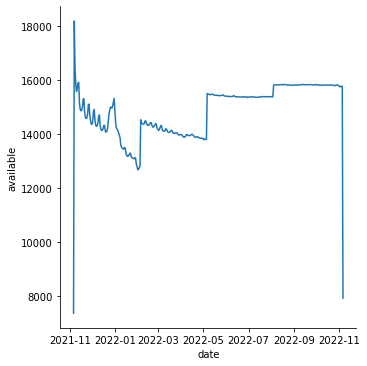

In [68]:
sns.relplot(data=df_bnb_cal_2, x='date', y='available', kind='line')

In [69]:
df_bnb_cal_detailed_20201214 = pd.read_csv("./data_airbnb_syd/20201214/calendar_detailed.csv", header='infer')

In [70]:
df_bnb_cal_detailed_20201214.describe(include='all')

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
count,1.236600e+07,12365996,12365996,12362571,12362571,1.236258e+07,1.236258e+07
unique,NaN,381,2,2136,2181,NaN,NaN
top,NaN,2021-06-23,f,$100.00,$100.00,NaN,NaN
freq,NaN,33871,9304588,438327,436669,NaN,NaN
mean,2.526602e+07,NaN,NaN,NaN,NaN,6.272656e+00,6.015855e+04
std,1.301695e+07,NaN,NaN,NaN,NaN,3.075695e+01,1.129490e+07
min,1.115600e+04,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00
25%,1.502624e+07,NaN,NaN,NaN,NaN,1.000000e+00,3.500000e+01
50%,2.412389e+07,NaN,NaN,NaN,NaN,3.000000e+00,1.125000e+03
75%,3.736858e+07,NaN,NaN,NaN,NaN,5.000000e+00,1.125000e+03


In [71]:
df_bnb_cal_detailed_20201214

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,29340087,2020-12-15,f,$116.00,$116.00,1.0,1125.0
1,29340087,2020-12-16,f,$116.00,$116.00,1.0,1125.0
2,29340087,2020-12-17,t,$116.00,$116.00,1.0,1125.0
3,29340087,2020-12-18,t,$166.00,$166.00,1.0,1125.0
4,29340087,2020-12-19,t,$165.00,$165.00,1.0,1125.0
...,...,...,...,...,...,...,...
12365991,28845262,2021-12-10,f,$400.00,$400.00,2.0,1125.0
12365992,28845262,2021-12-11,f,$400.00,$400.00,2.0,1125.0
12365993,28845262,2021-12-12,f,$400.00,$400.00,2.0,1125.0
12365994,28845262,2021-12-13,f,$400.00,$400.00,2.0,1125.0


In [73]:
df_bnb_cal_detailed_20201214['listing_id'].unique().shape

(33871,)

In [142]:
(df_bnb_cal_detailed['available']=='f').sum()

5441082

In [144]:
import os
available_count = []
unavailabe_count = []
for folder in FOLDERS:
    date_label = folder.split('/')[1]
    file_path = os.path.join(folder, 'calendar_detailed.csv') 
    df_temp = pd.read_csv(file_path, header='infer')
    available_count.append((date_label, (df_temp['available']=='t').sum()))
    unavailabe_count.append((date_label, (df_temp['available']=='f').sum()))

In [149]:
df_availability = pd.DataFrame({'date': [d for d, _ in available_count],
                                'available': [n for _, n in available_count],
                                'unavailable': [n for _, n in unavailabe_count]})
df_availability

,date,available,unavailable
0,20201214,3061408,9304588
1,20210110,3189914,9191779
2,20210208,3133942,9143054
3,20210304,3031163,9099174
4,20210410,3031163,9099174
5,20210605,2836151,8876041
6,20210705,2859163,8783975
7,20210807,2886912,8706961
8,20210908,2754817,8571136
9,20211009,2610491,8416291


In [158]:
df_availability['diff_unava_and_ava'] = df_availability['unavailable'] - df_availability['available']
df_availability

,date,available,unavailable,diff_ava_and_unava,available_ratio,diff_unava_and_ava
0,20201214,3061408,9304588,6243180,0.247567,6243180
1,20210110,3189914,9191779,6001865,0.257631,6001865
2,20210208,3133942,9143054,6009112,0.255269,6009112
3,20210304,3031163,9099174,6068011,0.249883,6068011
4,20210410,3031163,9099174,6068011,0.249883,6068011
5,20210605,2836151,8876041,6039890,0.242154,6039890
6,20210705,2859163,8783975,5924812,0.245566,5924812
7,20210807,2886912,8706961,5820049,0.249003,5820049
8,20210908,2754817,8571136,5816319,0.243230,5816319
9,20211009,2610491,8416291,5805800,0.236741,5805800


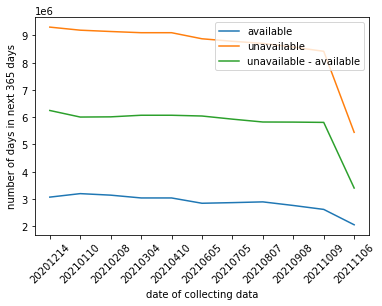

In [164]:


fig, ax = plt.subplots()
plt.xticks(rotation=45)
ax = sns.lineplot(data=df_availability, x='date', y='available', label='available')
ax2 = sns.lineplot(data=df_availability, x='date', y='unavailable', label='unavailable')
ax3 = sns.lineplot(data=df_availability, x='date', y='diff_unava_and_ava', label='unavailable - available')
plt.xlabel('date of collecting data')
plt.ylabel('number of days in next 365 days')
plt.legend()

In [156]:
df_availability['available_ratio'] = df_availability['available'] / (df_availability['available'] + df_availability['unavailable'])
df_availability

,date,available,unavailable,diff_ava_and_unava,available_ratio
0,20201214,3061408,9304588,6243180,0.247567
1,20210110,3189914,9191779,6001865,0.257631
2,20210208,3133942,9143054,6009112,0.255269
3,20210304,3031163,9099174,6068011,0.249883
4,20210410,3031163,9099174,6068011,0.249883
5,20210605,2836151,8876041,6039890,0.242154
6,20210705,2859163,8783975,5924812,0.245566
7,20210807,2886912,8706961,5820049,0.249003
8,20210908,2754817,8571136,5816319,0.243230
9,20211009,2610491,8416291,5805800,0.236741


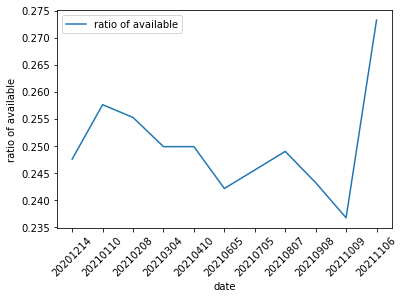

In [157]:
fig, ax = plt.subplots()
plt.xticks(rotation=45)
ax = sns.lineplot(data=df_availability, x='date', y='available_ratio', label='ratio of available')
plt.xlabel('date')
plt.ylabel('ratio of available')
plt.legend()

### look into listing.csv ###
- Summary information and metrics for listings in Sydney (good for visualisations).
- One row per property, unique.

In [74]:
df_listings_summary_20211106 = pd.read_csv("./data_airbnb_syd/20211106/listings.csv", header='infer')


(20513,)

In [76]:
df_listings_summary_20211106.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11156,An Oasis in the City,40855,Colleen,NaN,Sydney,-33.86767,151.22497,Private room,65,90,196,2020-03-05,2.02,1,364,0,NaN
1,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.80084,151.26378,Entire home/apt,470,2,3,2021-06-01,0.04,2,129,1,Exempt
2,15253,Unique Designer Rooftop Apartment in City Loca...,59850,Morag,NaN,Sydney,-33.87964,151.21680,Private room,79,2,377,2021-04-19,3.54,1,342,13,PID-STRA-24061-7
3,44545,Sunny Darlinghurst Warehouse Apartment,112237,Atari,NaN,Sydney,-33.87888,151.21439,Entire home/apt,130,90,76,2019-08-20,1.00,1,0,0,NaN
4,58506,"Studio Yindi @ Mosman, Sydney",279955,John,NaN,Mosman,-33.81748,151.23484,Entire home/apt,140,2,293,2021-03-22,3.13,1,311,11,PID-STRA-6093


In [77]:
df_listings_summary_20211106.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,2.051300e+04,20506,2.051300e+04,20508,0.0,20513,20513.000000,20513.000000,20513,20513.000000,20513.000000,20513.000000,14878,14878.000000,20513.000000,20513.000000,20513.000000,6761
unique,NaN,20137,NaN,5367,NaN,38,NaN,NaN,4,NaN,NaN,NaN,2297,NaN,NaN,NaN,NaN,4744
top,NaN,Sydney CBD near Train UTS DarlingHar&ICC&China...,NaN,David,NaN,Sydney,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,Exempt
freq,NaN,11,NaN,206,NaN,4841,NaN,NaN,12990,NaN,NaN,NaN,168,NaN,NaN,NaN,NaN,1135
mean,2.665782e+07,NaN,1.009963e+08,NaN,NaN,NaN,-33.859949,151.197819,NaN,235.509482,64.239555,17.920587,NaN,0.759488,7.318822,99.377273,2.871155,NaN
std,1.441630e+07,NaN,1.047576e+08,NaN,NaN,NaN,0.078961,0.093126,NaN,474.852894,52.279666,42.741221,NaN,2.011379,23.360893,133.457188,9.584322,NaN
min,1.115600e+04,NaN,1.085700e+04,NaN,NaN,NaN,-34.100680,150.630490,NaN,13.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.456135e+07,NaN,1.975957e+07,NaN,NaN,NaN,-33.899110,151.172510,NaN,79.000000,5.000000,0.000000,NaN,0.060000,1.000000,0.000000,0.000000,NaN
50%,2.598800e+07,NaN,5.250512e+07,NaN,NaN,NaN,-33.881560,151.214110,NaN,130.000000,90.000000,2.000000,NaN,0.200000,1.000000,0.000000,0.000000,NaN
75%,3.980829e+07,NaN,1.599334e+08,NaN,NaN,NaN,-33.824380,151.260660,NaN,235.000000,90.000000,14.000000,NaN,0.880000,2.000000,180.000000,1.000000,NaN


In [80]:
print('number of properties {}'.format(df_listings_summary_20211106['id'].unique().shape[0]))
print('number of hosts {}'.format(df_listings_summary_20211106['host_id'].unique().shape[0]))

number of properties 20513
number of hosts 14977


In [75]:
df_listings_summary_20201214 = pd.read_csv("./data_airbnb_syd/20201214/listings.csv", header='infer')
df_listings_summary_20201214['id'].unique().shape

(33871,)

In [81]:
print('number of properties {}'.format(df_listings_summary_20201214['id'].unique().shape[0]))
print('number of hosts {}'.format(df_listings_summary_20201214['host_id'].unique().shape[0]))

number of properties 33871
number of hosts 25321


In [88]:
import os
property_numbers = []
host_numbers = []
for folder in FOLDERS:
    date_label = folder.split('/')[1]
    file_path = os.path.join(folder, 'listings.csv') 
    df_temp = pd.read_csv(file_path, header='infer')
    property_numbers.append((date_label, df_temp['id'].unique().shape[0]))
    host_numbers.append((date_label, df_temp['host_id'].unique().shape[0]))


In [89]:
property_numbers

[('20201214', 33871),
 ('20210110', 33902),
 ('20210208', 33630),
 ('20210304', 33229),
 ('20210410', 33229),
 ('20210605', 32079),
 ('20210705', 31899),
 ('20210807', 31764),
 ('20210908', 31030),
 ('20211009', 30223),
 ('20211106', 20513)]

In [90]:
host_numbers

[('20201214', 25321),
 ('20210110', 25097),
 ('20210208', 24965),
 ('20210304', 24759),
 ('20210410', 24759),
 ('20210605', 24055),
 ('20210705', 23913),
 ('20210807', 23799),
 ('20210908', 23467),
 ('20211009', 22980),
 ('20211106', 14977)]

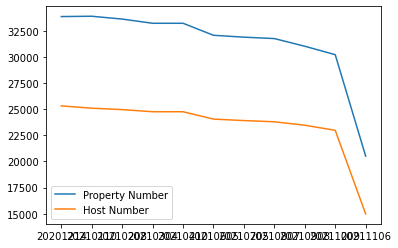

In [96]:
import matplotlib.pyplot as plt
df_property_host_numbers = pd.DataFrame({'date': [d for d, _ in property_numbers],
                                         'property_number': [n for _, n in property_numbers],
                                         'host_number': [n for _, n in host_numbers]})
plt.plot(df_property_host_numbers['date'], df_property_host_numbers['property_number'], label='Property Number')
plt.plot(df_property_host_numbers['date'], df_property_host_numbers['host_number'], label='Host Number')
plt.legend()

In [119]:
#sns.relplot(data=df_property_host_numbers, kind='line')

In [112]:
#pd.melt(df_property_host_numbers, 
#        id_vars=['date'], 
#        value_vars=['property_number', 'host_number'],
#        var_name='number',
#       )

In [113]:
#sns.relplot(data=pd.melt(df_property_host_numbers, 
#                         id_vars=['date'], 
#                         value_vars=['property_number', 'host_number'],
#                         var_name='type',
#                         value_name='number'), 
#            x='date', 
#            y='number', 
#            hue='type', 
#            kind='line')

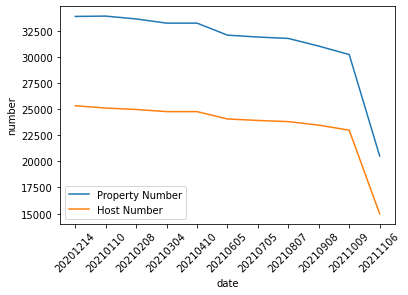

In [161]:
fig, ax = plt.subplots()
plt.xticks(rotation=45)
ax = sns.lineplot(data=df_property_host_numbers, x='date', y='property_number', label='Property Number')
ax1 = sns.lineplot(data=df_property_host_numbers, x='date', y='host_number', label='Host Number')
plt.xlabel('date')
plt.ylabel('number')
plt.legend()

### look into reviews.csv ###
- summary of reviews

### look into neighbourhoods.csv and neighbourhoods.geojson ###

In [130]:
df_neighbourhoods_csv = pd.read_csv('./data_airbnb_syd/20210110/neighbourhoods.csv', header='infer')
df_neighbourhoods_csv.head()

,neighbourhood_group,neighbourhood
0,NaN,Ashfield
1,NaN,Auburn
2,NaN,Bankstown
3,NaN,Blacktown
4,NaN,Botany Bay


In [131]:
df_neighbourhoods_csv.count()

neighbourhood_group     0
neighbourhood          38
dtype: int64

In [132]:
df_neighbourhoods_csv

,neighbourhood_group,neighbourhood
0,NaN,Ashfield
1,NaN,Auburn
2,NaN,Bankstown
3,NaN,Blacktown
4,NaN,Botany Bay
5,NaN,Burwood
6,NaN,Camden
7,NaN,Campbelltown
8,NaN,Canada Bay
9,NaN,Canterbury


In [135]:
df_neighbourhoods_geo = pd.read_json('./data_airbnb_syd/20210110/neighbourhoods.geojson')
df_neighbourhoods_geo.head()

,type,features
0,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
1,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
2,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
3,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
4,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."


In [139]:
print(df_neighbourhoods_geo.iloc[0])
print(df_neighbourhoods_geo.iloc[0]['features'])


type                                        FeatureCollection
features    {'type': 'Feature', 'geometry': {'type': 'Mult...
Name: 0, dtype: object
{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[151.296135, -33.572925], [151.296182, -33.572926], [151.296229, -33.572924], [151.29629, -33.572916], [151.296352, -33.572902], [151.296413, -33.572885], [151.296474, -33.572867], [151.296535, -33.572852], [151.296612, -33.572841], [151.296692, -33.572834], [151.29677, -33.572827], [151.296844, -33.572812], [151.296911, -33.572785], [151.296966, -33.572739], [151.297012, -33.572678], [151.297054, -33.572612], [151.297099, -33.572548], [151.297152, -33.572495], [151.297275, -33.572431], [151.297422, -33.572394], [151.297582, -33.572377], [151.297746, -33.572373], [151.297903, -33.572372], [151.298123, -33.572383], [151.298347, -33.572415], [151.29857, -33.572467], [151.298785, -33.572537], [151.298988, -33.572624], [151.299111, -33.57269], [151.299228, -33.572765], [1